#Checking Ram

In [18]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 27.3 gigabytes of available RAM

You are using a high-RAM runtime!


#Mount Google drive

In [19]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#numpy and pandas

In [20]:
import numpy as np
import pandas as pd

dataset = pd.read_csv('/content/drive/MyDrive/Thesis_Data/EEG_HMC_Wake_NREM_REM_3000.csv')



dataset.head()
target="Sleep Stage"


In [21]:
dataset.shape

(3000, 76)

In [22]:
dataset.describe()

MeanP_Alpha_F4  MedianF_Alpha_F4  MeanF_Alpha_F4  \
count     3000.000000       3000.000000     3000.000000   
mean         0.000426          9.395700       16.318189   
std          0.000579          1.056203        2.421351   
min          0.000091          5.120000       11.239020   
25%          0.000180          8.866340       14.860490   
50%          0.000230          9.365850       15.984390   
75%          0.000510          9.865370       16.983410   
max          0.009070         15.235120       26.349270   

       Spectral Edge_Alpha_F4  PeakF_Alpha_F4  MeanP_Beta_F4  MedianF_Beta_F4  \
count             3000.000000     3000.000000    3000.000000      3000.000000   
mean                15.531499        8.461820       0.000539        15.935355   
std                  2.627901        2.003914       0.001321         3.313279   
min                 10.240000        2.872200       0.000094         8.991220   
25%                 13.736590        6.868290       0.000170        13.861460   
50%                 15.110240        8.117070       0.000260        15.484880   
75%                 16.234150        9.865370       0.000430        16.983410   
max                 27.598050       21.603900       0.023070        27.348290   

       MeanF_Beta_F4  Spectral Edge_Beta_F4  PeakF_Beta_F4  ...  \
count    3000.000000            3000.000000    3000.000000  ...   
mean       26.833337              30.644532      28.141726  ...   
std         6.844106               9.345749      17.499984  ...   
min        17.108290              16.234150       6.493660  ...   
25%        22.727800              23.601950      12.362930  ...   
50%        24.975610              27.847800      19.106340  ...   
75%        29.346340              35.465370      49.951220  ...   
max        49.826340              49.951220      50.076100  ...   

       MeanP_Delta_O2  MedianF_Delta_O2  MeanF_Delta_O2  \
count     3000.000000       3000.000000     3000.000000   
mean         0.009766          0.991989        6.134967   
std          0.048910          0.279742        1.191390   
min          0.000240          0.124880        1.623410   
25%          0.000560          0.874150        5.744390   
50%          0.000940          0.999020        6.243900   
75%          0.002352          1.123900        6.618540   
max          0.923220          2.247800       13.112200   

       Spectral Edge_Delta_O2  PeakF_Delta_O2  MeanP_Gamma_O2  \
count             3000.000000     3000.000000     3000.000000   
mean                 3.135855        0.750433        0.000136   
std                  0.787203        0.232703        0.000522   
min                  0.624390        0.124880        0.000009   
25%                  2.747320        0.624390        0.000023   
50%                  3.371710        0.749270        0.000028   
75%                  3.621460        0.874150        0.000045   
max                  6.243900        2.747320        0.009810   

       MedianF_Gamma_O2  MeanF_Gamma_O2  Spectral Edge_Gamma_O2  \
count       3000.000000     3000.000000             3000.000000   
mean          38.360163       45.633352               49.122280   
std            9.051138        5.533491                1.971033   
min           15.984390       32.343410               37.713170   
25%           31.219510       40.085850               49.826340   
50%           38.774635       49.826340               49.951220   
75%           48.702440       49.826340               49.951220   
max           49.951220       49.951220               55.196100   

       PeakF_Gamma_O2  
count     3000.000000  
mean        47.321954  
std          7.687078  
min          7.367800  
25%         49.951220  
50%         49.951220  
75%         49.951220  
max         50.076100  

[8 rows x 75 columns]

In [23]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 76 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Sleep Stage             3000 non-null   object 
 1   MeanP_Alpha_F4          3000 non-null   float64
 2   MedianF_Alpha_F4        3000 non-null   float64
 3   MeanF_Alpha_F4          3000 non-null   float64
 4   Spectral Edge_Alpha_F4  3000 non-null   float64
 5   PeakF_Alpha_F4          3000 non-null   float64
 6   MeanP_Beta_F4           3000 non-null   float64
 7   MedianF_Beta_F4         3000 non-null   float64
 8   MeanF_Beta_F4           3000 non-null   float64
 9   Spectral Edge_Beta_F4   3000 non-null   float64
 10  PeakF_Beta_F4           3000 non-null   float64
 11  MeanP_Theta_F4          3000 non-null   float64
 12  MedianF_Theta_F4        3000 non-null   float64
 13  MeanF_Theta_F4          3000 non-null   float64
 14  Spectral Edge_Theta_F4  3000 non-null   

In [24]:
dataset[target].value_counts() 

NREM    1798
Wake     629
REM      573
Name: Sleep Stage, dtype: int64

#Label Encoding

In [25]:
from sklearn.preprocessing import LabelEncoder

classes = np.array(sorted(list(set(dataset[target]))))
print("Before encoding: ",classes)
encoder=LabelEncoder()
dataset[target]=encoder.fit_transform(dataset[target])
print("After encoding:",set(dataset[target]))

Before encoding:  ['NREM' 'REM' 'Wake']
After encoding: {0, 1, 2}


In [26]:
#from label encoder the actual values were changed 
classes_dict={
    0: "NREM",
    1: "REM",
    2: "WAKE"
}

#Dataset spliting to X and y

In [27]:
X = dataset.loc[:, dataset.columns!=target]
y = dataset[target]

list_of_feat = X.columns

#Dataset Scaling

In [28]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)
X =  scaler.transform(X)

#Dataset spliting for training and testing

In [29]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [30]:
y_train.value_counts()

0    1447
2     494
1     459
Name: Sleep Stage, dtype: int64

#Dataset Balancing

In [31]:
!pip install imbalanced-learn
from imblearn.over_sampling import SMOTE

smote = SMOTE()

X_train, y_train= smote.fit_resample(X_train, y_train)

#new_dataset=pd.concat([pd.DataFrame(X_temp), pd.DataFrame(y_temp)], axis=1)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [32]:
y_train.value_counts()

0    1447
1    1447
2    1447
Name: Sleep Stage, dtype: int64

#Training 

##With Default parameters

In [33]:
from sklearn.ensemble import AdaBoostClassifier

ada_defult = AdaBoostClassifier(random_state=0)
ada_defult.fit(X_train, y_train)
y_pred = ada_defult.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))

[[302  41   8]
 [ 25  88   1]
 [ 19   2 114]]
              precision    recall  f1-score   support

           0       0.87      0.86      0.87       351
           1       0.67      0.77      0.72       114
           2       0.93      0.84      0.88       135

    accuracy                           0.84       600
   macro avg       0.82      0.83      0.82       600
weighted avg       0.85      0.84      0.84       600

Accurecy:  0.84


##Tunning <i>n_estimators</i>

1/30 round completed......................... Accurecy: 0.365
2/30 round completed......................... Accurecy: 0.3933333333333333
3/30 round completed......................... Accurecy: 0.7666666666666667
4/30 round completed......................... Accurecy: 0.8633333333333333
5/30 round completed......................... Accurecy: 0.8633333333333333
6/30 round completed......................... Accurecy: 0.8633333333333333
7/30 round completed......................... Accurecy: 0.7966666666666666
8/30 round completed......................... Accurecy: 0.8266666666666667
9/30 round completed......................... Accurecy: 0.785
10/30 round completed......................... Accurecy: 0.7916666666666666
11/30 round completed......................... Accurecy: 0.7716666666666666
12/30 round completed......................... Accurecy: 0.8016666666666666
13/30 round completed......................... Accurecy: 0.805
14/30 round completed......................... Accurecy: 0.8

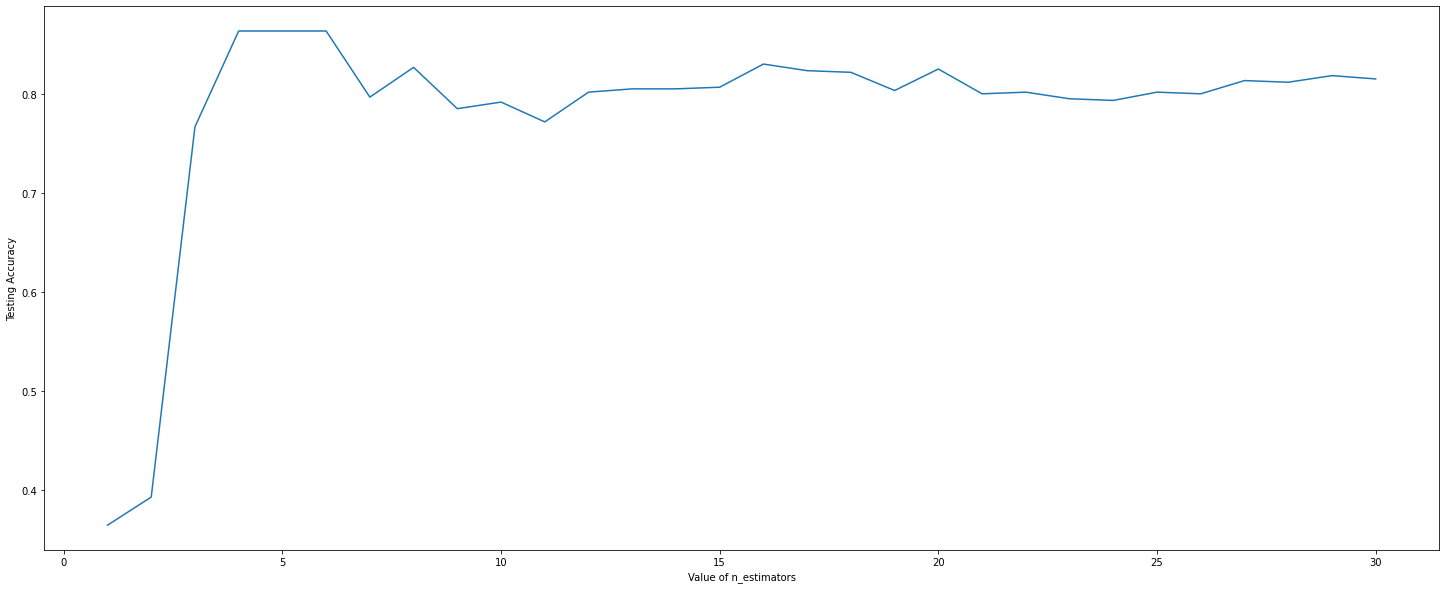

In [34]:
from sklearn.ensemble import AdaBoostClassifier
N=30
k_range = range (1,N+1)
scores={}
scores_list = []
for k in k_range:
  classifier = AdaBoostClassifier(n_estimators=k,random_state=0)
  classifier.fit(X_train, y_train)
  y_pred=classifier.predict(X_test)
  scores[k] = accuracy_score(y_test,y_pred)
  scores_list.append(accuracy_score(y_test,y_pred))
  print(str(k)+"/"+str(N)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))



%matplotlib inline
import matplotlib.pyplot as plt
#plot the relationship between K and the testing accuracy
plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')



print("The best n_estimators:")
best_estimator=list(scores.keys())[scores_list.index(max(scores_list))]
print(best_estimator)

##Result for best estimator

In [36]:
from sklearn.ensemble import AdaBoostClassifier

ada_best_estimator = AdaBoostClassifier(n_estimators=best_estimator,random_state=0)
ada_best_estimator.fit(X_train, y_train)
y_pred = ada_best_estimator.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))

[[320   7  24]
 [ 31  79   4]
 [  8   8 119]]
              precision    recall  f1-score   support

           0       0.89      0.91      0.90       351
           1       0.84      0.69      0.76       114
           2       0.81      0.88      0.84       135

    accuracy                           0.86       600
   macro avg       0.85      0.83      0.83       600
weighted avg       0.86      0.86      0.86       600

Accurecy:  0.8633333333333333


#Set the model to be explained and visualization

<font color='coral'>Caution:</font> Please set the <i>trained_model</i> before proceeding

In [37]:
trained_model = ada_best_estimator

#Visualization

##ROC CURVE

In [38]:
!pip install kaleido

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 16.9 MB/s eta 0:00:00


In [39]:
import plotly.graph_objects as go
import plotly.express as px
import numpy as np
import pandas as pd
from sklearn.metrics import roc_curve, roc_auc_score
import pandas as pd
import matplotlib.pyplot as plt

def ploty_ROC_1(model,lebel_dict):

  y_scores = model.predict_proba(X_test)

  y_onehot = pd.get_dummies(y_test, columns=model.classes_)

  fig = go.Figure()
  fig.add_shape(
      type='line', line=dict(dash='dash'),
      x0=0, x1=1, y0=0, y1=1
  )

  for i in range(y_scores.shape[1]):
      y_true = y_onehot.iloc[:, i]
      y_score = y_scores[:, i]

      fpr, tpr, _ = roc_curve(y_true, y_score)
      auc_score = roc_auc_score(y_true, y_score)
      name = f"{lebel_dict[y_onehot.columns[i]]} (AUC={auc_score:.2f})"
      fig.add_trace(go.Scatter(x=fpr, y=tpr, name=name, mode='lines'))

  fig.update_layout(
      xaxis_title='False Positive Rate',
      yaxis_title='True Positive Rate',
      yaxis=dict(scaleanchor="x", scaleratio=1),
      xaxis=dict(constrain='domain'),
      width=1000, height=1000,
      font=dict(
        family="Courier New, monospace",
        size=20,
        color="BLack"
    ),
    legend=dict(
        x=0.67,
        y=0.05,
        traceorder="reversed",
        title_font_family="Times New Roman",
        font=dict(
            family="Courier New, monospace",
            size=20,
            color="black"
        ),
        bgcolor="LightSteelBlue",
        bordercolor="White",
        borderwidth=2
    )
  )
  fig.show()



ploty_ROC_1(trained_model,classes_dict)

#Confusion Matrix

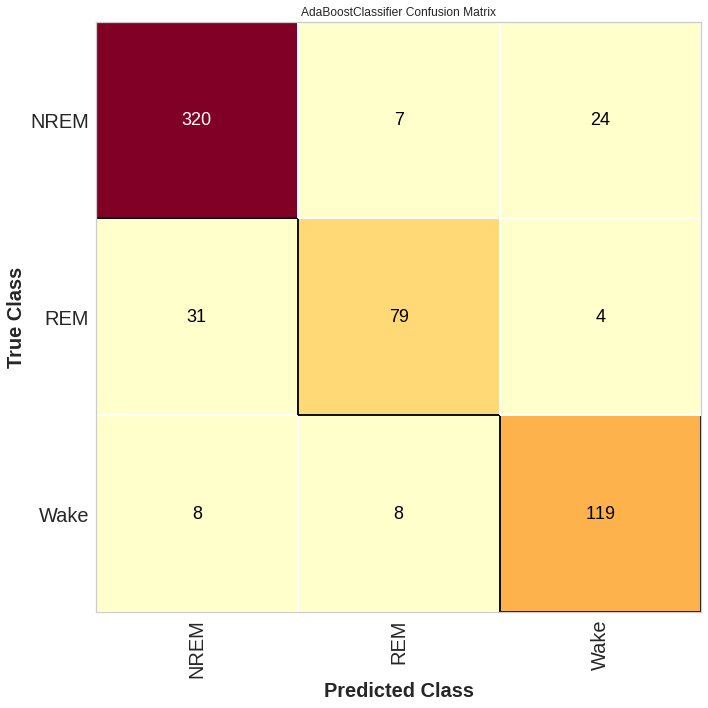

--------------------
--------------------


In [40]:
import matplotlib.pyplot as plt
from yellowbrick.classifier import ConfusionMatrix
import matplotlib.dates as dates



def Conf_Mat(X_,y_,attb,model,cls):


  fig = plt.figure(figsize=(attb["Fig Height"],attb["Fig weidth"]))
  ax = fig.add_subplot(111)

  cm = ConfusionMatrix(model, classes=cls,fontsize=attb["Confusion Matrix Inner Fontsize"],ax=ax)
  cm.fit(X_train, y_train)
  cm.score(X_, y_)
      
  cm.ax.set_xlabel("Predicted Class", fontsize=attb["X Axis Fontsize"],fontweight="bold")
  cm.ax.set_ylabel("True Class", fontsize=attb["Y Axis Fontsize"],fontweight="bold")
  cm.ax.xaxis.set_tick_params(labelsize=attb["X Label Fontsize"])
  cm.ax.yaxis.set_tick_params(labelsize=attb["Y Label Fontsize"])
  for label in ax.get_xticklabels():
    label.set_fontweight(550)
  for label in ax.get_yticklabels():
    label.set_fontweight(550)
  
  plt.savefig("Testing_confusion_mat"+str(model)+".png")
  cm.show()
  print("--------------------")
  print("--------------------")


attributes={
   "Fig Height": 10,
   "Fig weidth": 10, 
    
  "Y Axis Fontsize" : 20,
  "X Axis Fontsize" : 20,

  "Y Label Fontsize" : 20,
  "X Label Fontsize" : 20,

  "Confusion Matrix Inner Fontsize": 18


}


Conf_Mat(X_test,y_test,attributes,trained_model,classes)
     
     

#XAI

##SHAP (SHapley Additive exPlanations)

<font color='coral'> Docmumentation: </font> <a href = "https://shap.readthedocs.io/en/latest/#:~:text=SHAP%20(SHapley%20Additive%20exPlanations)%20is,papers%20for%20details%20and%20citations).">Click Here</a>

In [41]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 575.9/575.9 KB 19.9 MB/s eta 0:00:00


###Global Explainer

In [49]:
def SHAP_EXP(model,graph_feat):
  print("Models: ",model)

  explainer = shap.Explainer(model.predict, X_test)

  shap_values1 = explainer(X_test)
  features_names=list_of_feat

  if 'Subjects' in features_names:
    features_names.pop(0)


  shap.plots.bar(shap_values1,max_display=graph_feat["max_display"])

  print("---------------------")

  shap.summary_plot(shap_values1,max_display=graph_feat["max_display"],feature_names=features_names)

  print("---------------------")

  print("Local Explaination")
  shap.plots.waterfall(shap_values1[graph_feat["shap_values Index"]],max_display=graph_feat["max_display"])


  print("---------------------")

  shap.plots.bar(shap_values1[graph_feat["shap_values Index"]],max_display=graph_feat["max_display"])

Models:  AdaBoostClassifier(n_estimators=4, random_state=0)


Permutation explainer: 601it [01:02,  8.48it/s]


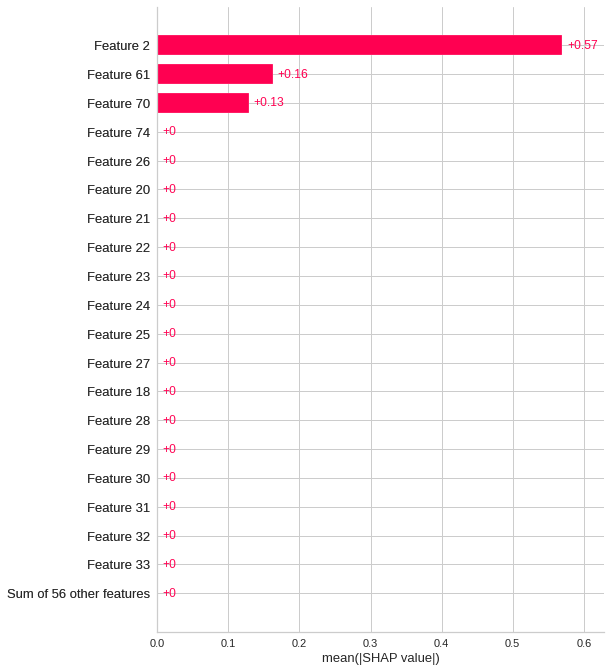

---------------------


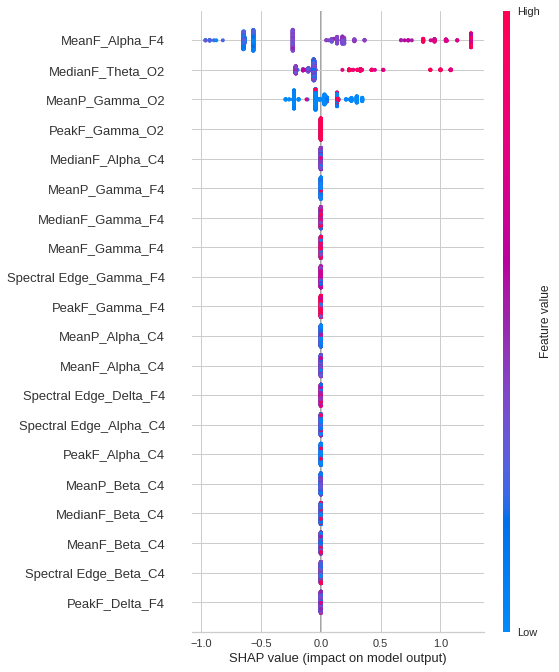

---------------------
Local Explaination


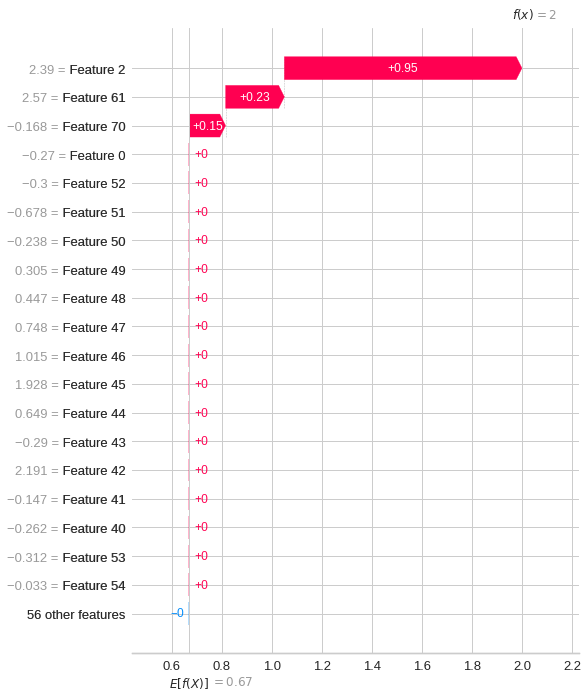

---------------------


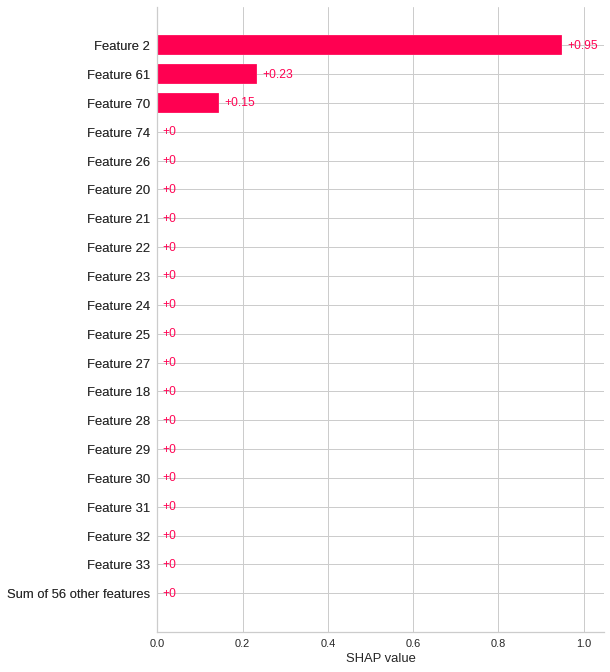

In [50]:

graph_feat={
    "max_display":20,
    "shap_values Index":2
}


SHAP_EXP(trained_model,graph_feat)
    

##LIME
<font color='coral'> Docmumentation: </font> <a href = "https://pypi.org/project/lime/">Click Here</a>


In [51]:
!pip install lime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 KB 13.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283857 sha256=68468e7e46f47da8829ab6748ad86d593461f2db90b8253ee06050ec0d1b1ef7
  Stored in directory: /root/.cache/pip/wheels/e6/a6/20/cc1e293fcdb67ede666fed293cb895395e7ecceb4467779546
Successfully built lime


In [52]:
import lime
from lime import lime_tabular
explainer = lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train),
    feature_names=list_of_feat,
    class_names=classes,
    mode='classification'
)

In [53]:
explain_row = 10

In [54]:
print("Actual value of test row: ", classes_dict[y_test[explain_row]])

Actual value of test row:  NREM


In [55]:
exp = explainer.explain_instance(X_test[explain_row],                  #index of row, which will be explained
                                 trained_model.predict_proba,
                                 num_features=6,              # how many features will be explained
                                 top_labels=3)                # number of classes        

exp.show_in_notebook(show_table=True, show_all=True)

In [56]:
from IPython.display import HTML

html_data = exp.as_html()
HTML(data=html_data)

exp.save_to_file(str(trained_model)+"_explanation.html")
     